# ***Importing libraries***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ***Loading data files***

In [4]:
movies=pd.read_csv('./movies.csv')
ratings=pd.read_csv('./ratings.csv')

# ***Data Visualisation***

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [5]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2643107 entries, 0 to 2643106
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  float64
dtypes: float64(2), int64(2)
memory usage: 80.7 MB


In [6]:
movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
ratings.head(5)

,userId,movieId,rating,timestamp
0,1,296,5.0,1.147880e+09
1,1,306,3.5,1.147869e+09
2,1,307,5.0,1.147869e+09
3,1,665,5.0,1.147879e+09
4,1,899,3.5,1.147869e+09


In [8]:
df=pd.merge(ratings,movies, how='left',on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,296,5.0,1.147880e+09,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,1,306,3.5,1.147869e+09,Three Colors: Red (Trois couleurs: Rouge) (1994),Drama
2,1,307,5.0,1.147869e+09,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
3,1,665,5.0,1.147879e+09,Underground (1995),Comedy|Drama|War
4,1,899,3.5,1.147869e+09,Singin' in the Rain (1952),Comedy|Musical|Romance


<BarContainer object of 20 artists>

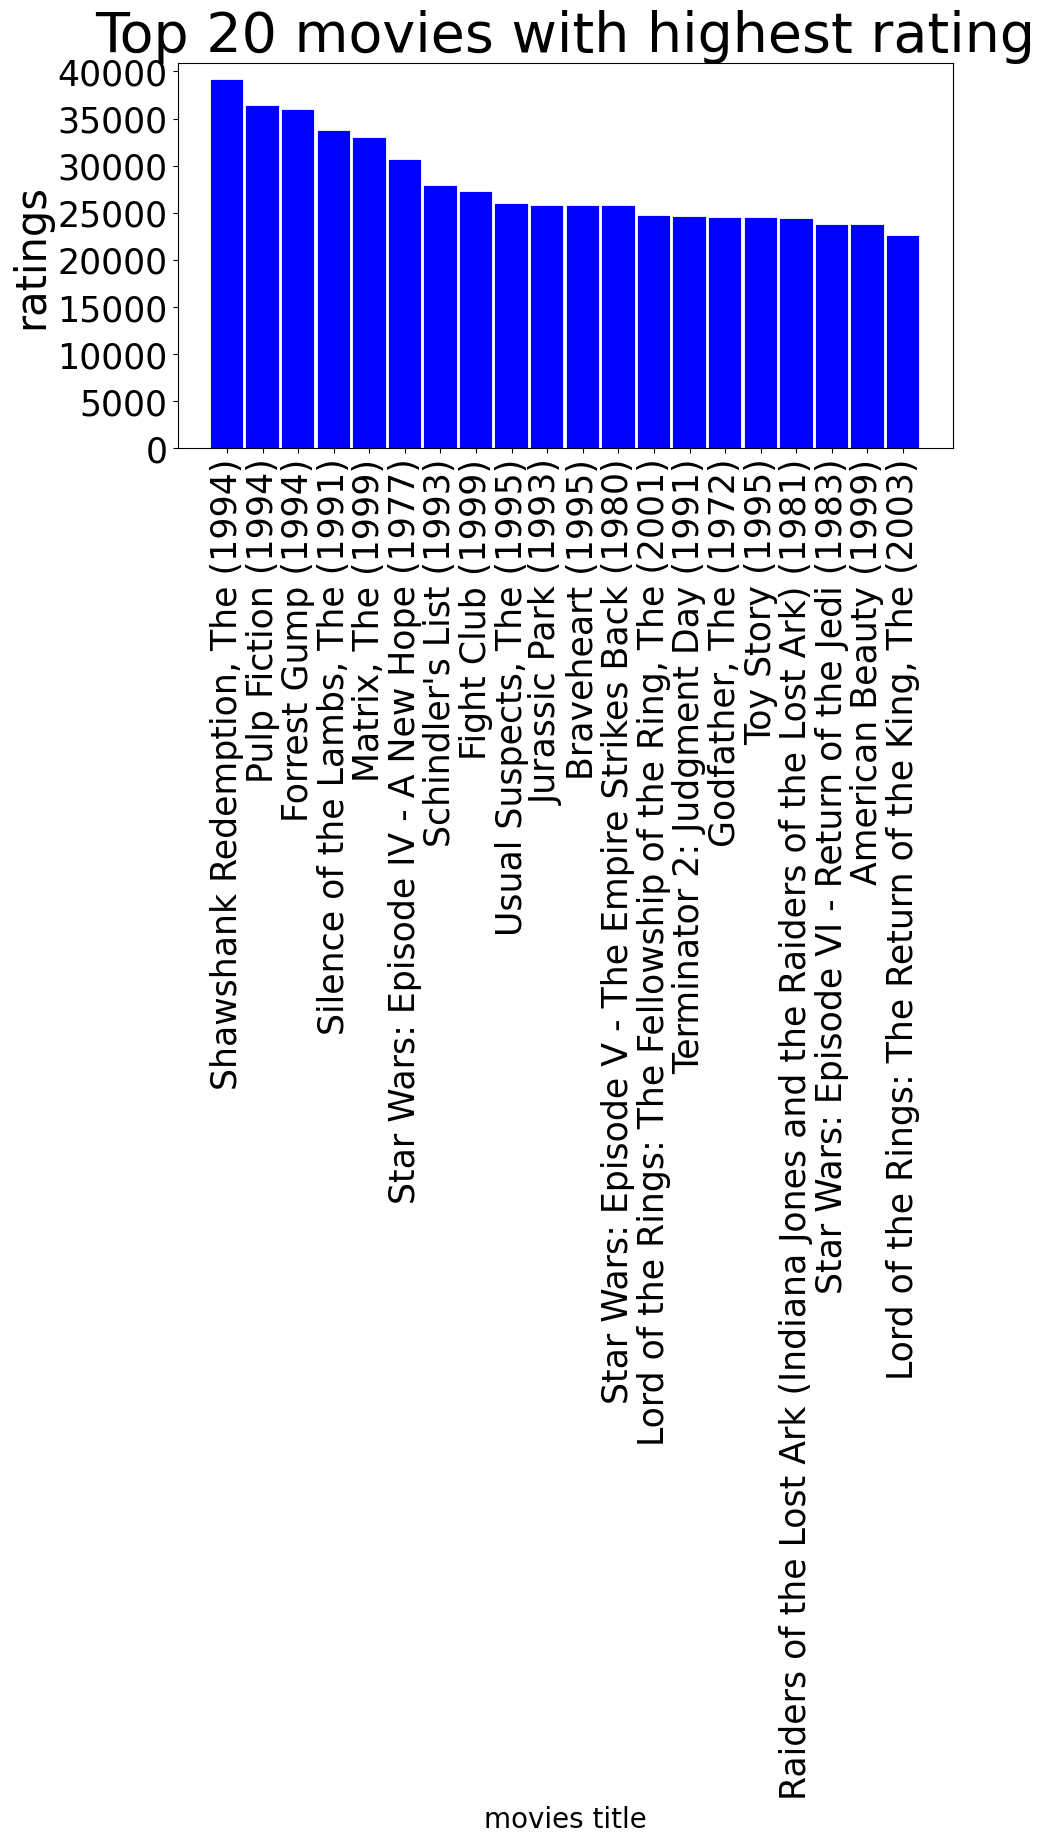

In [9]:
df1=df.groupby(['title'])[['rating']].sum()
high_rated=df1.nlargest(20,'rating')
high_rated.head()
plt.figure(figsize=(10,5))
plt.title('Top 20 movies with highest rating',fontsize=40)
colors=['red','yellow','orange','green','magenta','cyan','blue','lightgreen','skyblue','purple']
plt.ylabel('ratings',fontsize=30)
plt.xticks(fontsize=25,rotation=90)
plt.xlabel('movies title',fontsize=20)
plt.yticks(fontsize=25)
plt.bar(high_rated.index,high_rated['rating'],linewidth=3,edgecolor='blue',color='blue')

# ***Movie Recommender***

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
cv=TfidfVectorizer()
tfidf_matrix=cv.fit_transform(movies['genres'])


In [12]:
def create_array(data):
    arr=np.zeros(1682)
    for x,y in data.iterrows():
        arr[y[1]-1]=y[2]
    return arr
def cosine_similarity(a,b):
    temp=np.dot(a,b)
    a=a**2
    b=b**2
    return temp/(((sum(a))**0.5)*((sum(b)**0.5)))

In [16]:
indices = pd.Series(movies.index, index=movies['title'])
titles = movies['title']

In [17]:
def recommendations(title):
    idx = indices[title]
    cosine_sim = linear_kernel(tfidf_matrix[idx], tfidf_matrix)  # Compute cosine similarity
    sim_scores = list(enumerate(cosine_sim[0]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

# ***Testing***

In [21]:
recommended_movies = recommendations('Jumanji (1995)')
print(recommended_movies)

59                      Indian in the Cupboard, The (1995)
124                      NeverEnding Story III, The (1994)
986                        Escape to Witch Mountain (1975)
1954             Darby O'Gill and the Little People (1959)
2003                                   Return to Oz (1985)
2071                         NeverEnding Story, The (1984)
2072     NeverEnding Story II: The Next Chapter, The (1...
2308                         Santa Claus: The Movie (1985)
4790     Harry Potter and the Sorcerer's Stone (a.k.a. ...
9557                             Magic in the Water (1995)
10450    Chronicles of Narnia: The Lion, the Witch and ...
10674                          Five Children and It (2004)
10733    Brothers Lionheart, The (Bröderna Lejonhjärta)...
11332                          Bridge to Terabithia (2007)
11973                           Golden Compass, The (2007)
12042          Water Horse: Legend of the Deep, The (2007)
12347     Chronicles of Narnia: Prince Caspian, The (200